In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import ML.utils as ut

# pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("../data/bank-additional-full.csv", sep=";")
print(list(df.columns))
df.drop_duplicates()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Датасет без пропусков
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data processing and Future engineering

In [4]:
# Удалим значения с ненужными значениями
df = df.loc[df['marital'] != "unknown"]
df = df.loc[df['housing'] != "unknown"]
df = df.loc[df['job'] != "unknown"]
df = df.loc[df['education'] != "unknown"]
df = df.loc[df['education'] != "illiterate"]
df = df.loc[df['default'] != "yes"]


In [5]:
# Бинаризация
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df["contact"] = le.fit_transform(df["contact"])

## Сохраним датасет для теста

In [6]:
sample = df.sample(n=10, random_state=42).drop(columns=['y'])
sample.to_csv('../data/test.csv', index_label='id')

df = df.drop(index=sample.index)

## Перевод месяцев и дней в числовой формат

In [7]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [8]:
# Преобразование месяцев
ord_e = OrdinalEncoder(categories = [["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]])
df["month"] = ord_e.fit_transform(df["month"].values.reshape(-1, 1))


In [9]:
df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [10]:
# Преобразование дней
ord_e = OrdinalEncoder(categories = [["mon", "tue", "wed", "thu", "fri", "sat", "sun"]])
df["day_of_week"] = ord_e.fit_transform(df["day_of_week"].values.reshape(-1, 1))

## Удалим ненужный poutcome столбец, т.к он несет мало информации

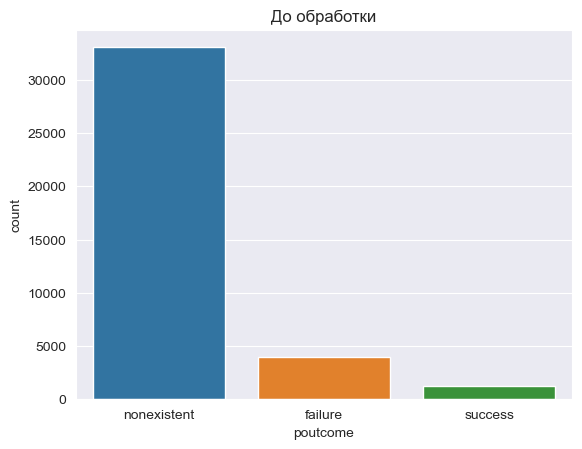

In [11]:
df["poutcome"].unique()
sns.countplot(df, x='poutcome')
plt.title("До обработки")
# Принимаю решение удалить этот столбец
df = df.drop(columns=["poutcome"])



## Объединим значения в семейном положении

Text(0.5, 1.0, 'После обработки')

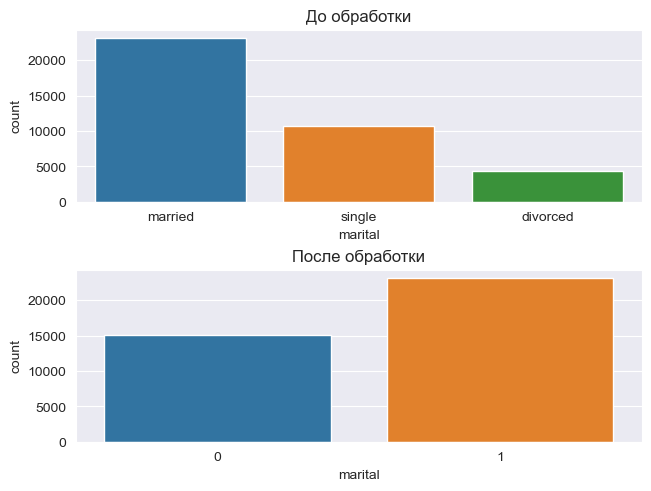

In [12]:
fig, axes = plt.subplots(2, constrained_layout=True)
sns.countplot(df, x='marital', ax=axes[0]).set_title('До обработки')

# Объединим single и divorced в просто single
dict_to_replace = {"married": 1, "single": 0, "divorced": 0}
df = df.replace({"marital": dict_to_replace})

sns.countplot(df, x='marital', ax=axes[1]).set_title("После обработки")



## Бинаризируем некоторые столбцы

In [13]:
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['default'] = le.fit_transform(df['default'])


## Бинаризация профессии: 1 - работает, 0 - не работает

Text(0.5, 1.0, 'После обработки')

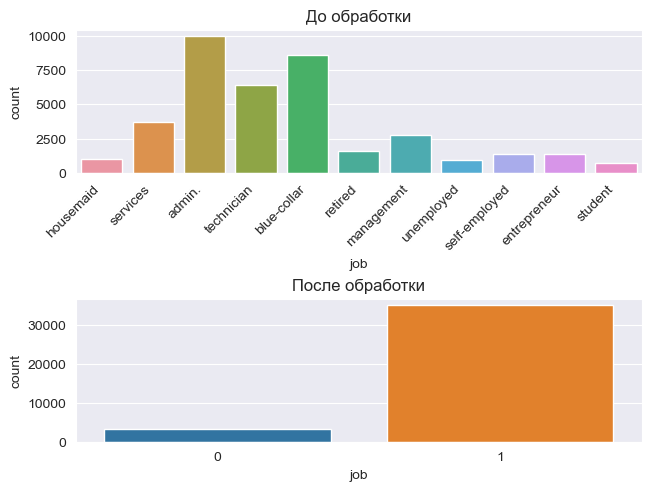

In [14]:
_, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='job', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')

dict_to_replace = {"housemaid": 1, "services": 1, "admin.": 1, "blue-collar": 1, "technician": 1, "retired": 0, "management": 1, "unemployed": 0, "self-employed": 1, "entrepreneur": 1, "student": 0}
df = df.replace({"job": dict_to_replace})
sns.countplot(df, x='job', ax=axes[1]).set_title('После обработки')



## Бинаризация образования в числовой формат: 1 - есть высшее, 0 - нет/школа

Text(0.5, 1.0, 'После обработки')

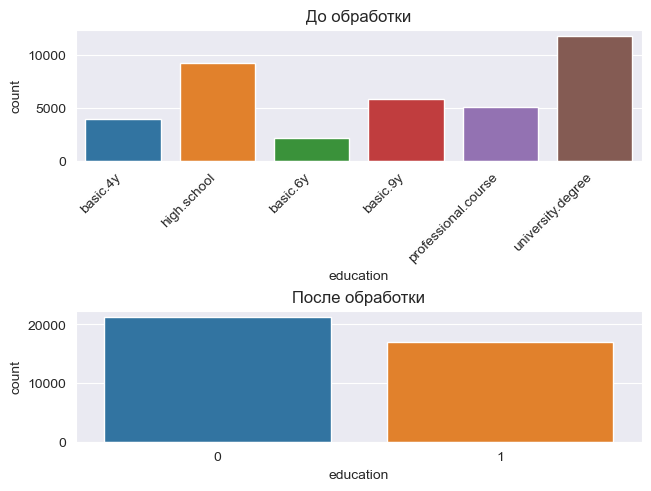

In [15]:
_, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='education', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')

dict_to_replace = {"university.degree": 1, "high.school": 0, "basic.9y": 0, "professional.course": 1, "basic.4y": 0, "basic.6y": 0}
df = df.replace({"education": dict_to_replace})
sns.countplot(df, x='education', ax=axes[1]).set_title('После обработки')

## Разобьем возраст на 3 категории: (17-30), (30-50), (50-100) (young, adult, old)

In [16]:
# Узнаем, сколько лежит людей в промежутках: (17-30), (30-50), (50-100) (young, adult, old)
print(np.histogram(df["age"].values, bins=[16,35,50,110]))

cut_labels = ['young', 'adult', 'old']
cut_bins = [16,35,50,110]

df['age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)
df['age'] = le.fit_transform(df['age'])

(array([13887, 17091,  7236], dtype=int64), array([ 16,  35,  50, 110]))


## Обработаем pdays: 999 - значит, что не сталкивались с клиентом до этого времени

In [17]:
cut_labels = ['old_client', 'new_client']
cut_bins = [-1,998,1000]

df['pdays'] = pd.cut(df['pdays'], bins=cut_bins, labels=cut_labels)
df['pdays'] = le.fit_transform(df['pdays'])

In [18]:
df = df.dropna()

# Анализ данных:

<Axes: xlabel='age', ylabel='count'>

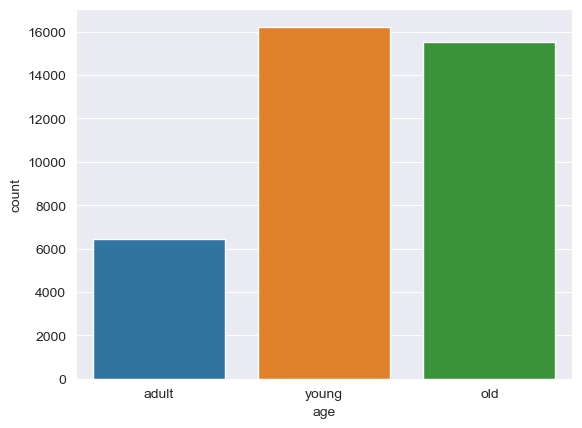

In [19]:
sns.countplot(data=df[df.y == 1], x=df.age.replace({0: 'young', 1: 'adult', 2: 'old'}))

**Видим, что молодые люди в возрасте 17 - 35 оформляют срочный депозит чаще всего.**

**Люди возраста 50 - 100 лет оформляют депозит чуть реже, чем молодые**

**Люди возраста 35 - 50 лет оформляют депозит очень редко**

<Axes: xlabel='job', ylabel='count'>

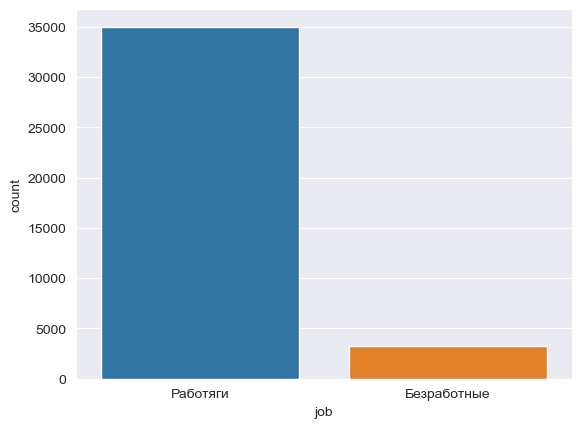

In [20]:
sns.countplot(data=df[df.y == 1], x=df.job.replace({0: 'Безработные', 1: 'Работяги'}))

**Люди с работой, очевидно, оформляют депозит гораздо чаще, чем безработные**

<Axes: xlabel='education', ylabel='count'>

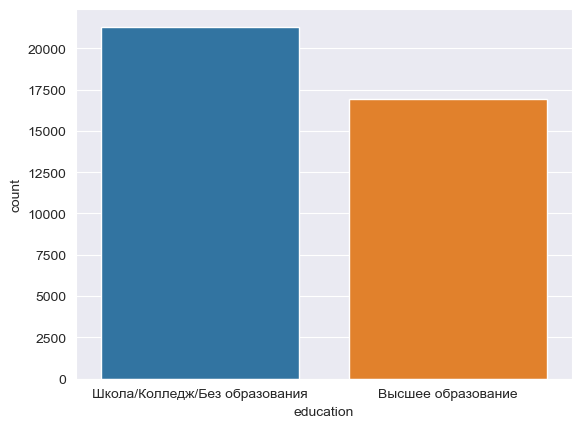

In [21]:
sns.countplot(data=df[df.y == 1], x=df.education.replace({0: 'Школа/Колледж/Без образования', 1: 'Высшее образование'}))

**На удивление люди с высшим образованием оформляют депозит реже, чем остальные люди**

<Axes: xlabel='marital', ylabel='count'>

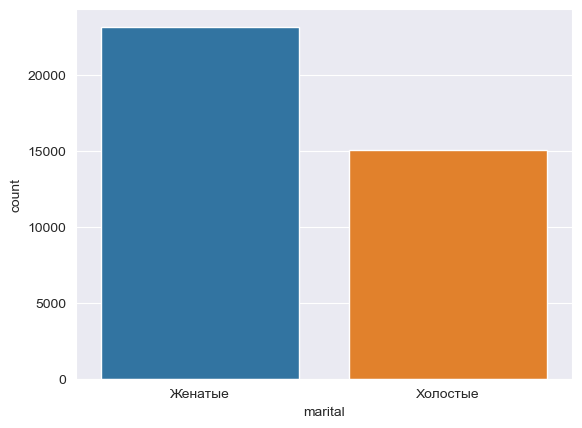

In [22]:
sns.countplot(data=df[df.y == 1], x=df.marital.replace({0: 'Холостые', 1: 'Женатые'}))

**Женатые люди берут депозит чуть чаще, чем холостые**

<Axes: xlabel='day_of_week', ylabel='count'>

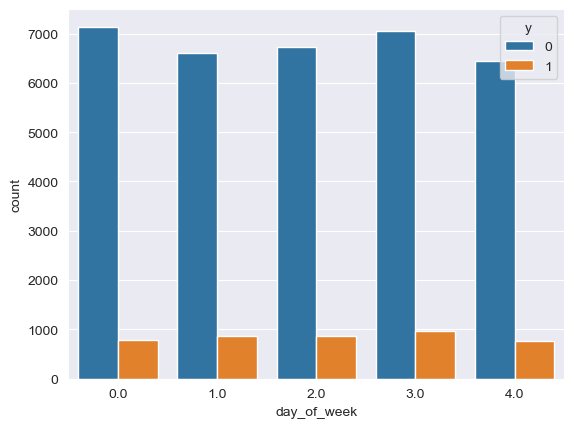

In [23]:
sns.countplot(data=df, x=df.day_of_week, hue=df.y.astype('str'))

**Каждый день количество оформленных и не оформленных депозитов примерно одинаковое**

In [24]:
num_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

<Axes: >

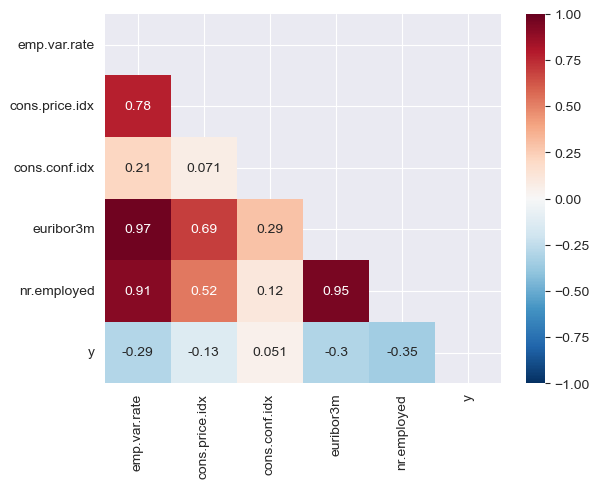

In [25]:
sns.heatmap(df[num_cols + ['y']].corr(),
            cmap='RdBu_r', # задаёт цветовую схему
            annot=True, # рисует значения внутри ячеек
            vmin=-1, vmax=1,
            mask=np.triu(df[num_cols + ['y']].corr()))

**Признаки коррелируют с целевой переменной, но множество других признаков - бинарные -> линейные модели, скорее всего, будут показывать плохие результаты**

## Балансировка датасета

y = 0 88.87 % of the dataset
y = 1: 11.13 % of the dataset


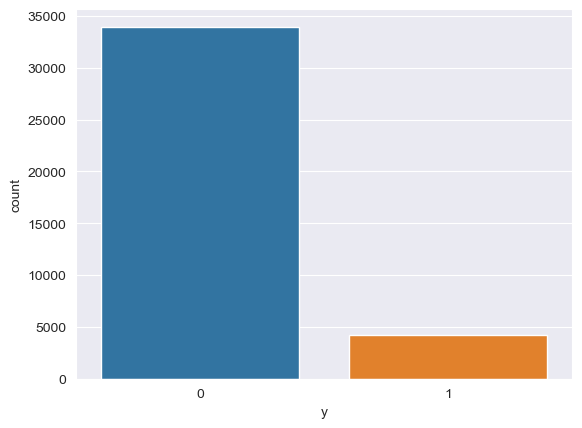

In [26]:
# Датасет является несбалансированным. Исправим это!
# Посмотрим, какой процент мошенничества в датасете
print('y = 0', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('y = 1:', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
sns.countplot(df, x='y')

# Перед тем, как начать балансировать датасет, сделаем копию, чтобы потом на ней проверить обобщающую способность
df_to_test = df.copy()

In [27]:
df = ut.balance_the_dataset(df, 'y')

In [28]:
df.to_csv('../data/train.csv', index='id')


In [29]:
sample.drop(columns=['y'])

KeyError: "['y'] not found in axis"